## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

**Q1)** Download a small (5-15) set of variables of interest.


In [1]:
import pandas as pd
#
var_list = ['abhlth', 'abrape','conmedic', 'abimp', 'marital', 'childs'] # List of variables you want to save
output_filename = 'new_selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

df_vars = pd.read_csv(output_filename)
df_vars.head(5)

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

,abhlth,abrape,conmedic,abimp,marital,childs
0,yes,yes,NaN,NaN,never married,0.0
1,yes,yes,NaN,NaN,married,5.0
2,yes,yes,NaN,NaN,married,4.0
3,yes,yes,NaN,NaN,married,0.0
4,yes,yes,NaN,NaN,married,2.0


**Q2** Write a short description of the data you chose, and why.

I chose variables that I felt overlapped in expressing the common sentiments about survey respondents' confidence levels in the American government's handling of currently controversial issues; specifically, abortion. The six variables chosen are: abany (abortion in any case), abrape (abortion in the case of rape), childs-rec (number of children per respondent), con_sc_judge (confidence in current supreme court justices), conmedic (confidence in American medicine), and men_vs_women_politics (belief whether men are better at politics than women). Altogether, I felt that these variables would demonstrate current beliefs about the American healthcare system as well as the confidence levels in the current government's choices/directives; especially actions regarding abortion since that is a primary interest of mine and the data.  In addition, the recent changes brought about the overturning of Roe v. Wade had sparked some great outcry on both sides, and I believe it would be interesting to see whether the data reflects those opinions (either side) and if there has been any significant change recorded.

**Q3)** Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.

In [7]:
# previewing dataframe:
df_vars.head(10)
# looking at data types:
print(df_vars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72390 entries, 0 to 72389
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   abhlth    46933 non-null  object 
 1   abrape    46491 non-null  object 
 2   conmedic  48501 non-null  object 
 3   abimp     2805 non-null   object 
 4   marital   72339 non-null  object 
 5   childs    72129 non-null  float64
dtypes: float64(1), object(5)
memory usage: 3.3+ MB
None


In [16]:
# DROPPING ABIMP COL (how important abortion is) col:
#   since majority of values are missing (96% are missing). Too many missing 
#   values, can not impute or use median as estimator for that many
#   missing values.
# df.drop(columns=['abimp'], inplace=True)
df_vars.head()

# FIXING CHILDS: can't have part of a child, so converting from float data type
#   to an integer. Also assuming that missing values are indicative of no children (0)
df_vars['childs'] = df['childs'].fillna(0).astype(int)

# FILLING NAN CATEGORICAL: replacing NaN values with string 'unknown' like shark dataframe.

categorical_columns = ['abhlth', 'abrape', 'conmedic', 'marital']

df[categorical_columns] = df[categorical_columns].astype(str)
df[categorical_columns] = df[categorical_columns].replace('nan', 'unknown')  # Handle actual 'nan' strings
df[categorical_columns] = df[categorical_columns].fillna('unknown')

# SAVE: saving cleaned dataset as its own separate copy:
df_vars.to_csv('cleaned_selected_gss_data.csv')

**Q4)** Produce some numeric summaries and visualizations.

In [42]:
# NUMERIC SUMMARIES:

cleaned_df = pd.read_csv("cleaned_selected_gss_data.csv")

# holding .describe as a var:
describe_summary = cleaned_df.describe()

# summing missing values:
NaN_stats = cleaned_df.isnull().sum()

# printing the 3 summarizing stats of cleaned df along with preview of df:
print(describe_summary, NaN_stats, cleaned_df.shape, cleaned_df.head(5))

        Unnamed: 0        childs
count  72390.00000  24130.000000
mean   36194.50000      1.828222
std    20897.33733      1.659864
min        0.00000      0.000000
25%    18097.25000      0.000000
50%    36194.50000      2.000000
75%    54291.75000      3.000000
max    72389.00000      8.000000 Unnamed: 0        0
abhlth        25457
abrape        25899
conmedic      23889
marital          51
childs        48260
dtype: int64 (72390, 6)    Unnamed: 0 abhlth abrape conmedic        marital  childs
0           0    yes    yes      NaN  never married     2.0
1           1    yes    yes      NaN        married     0.0
2           2    yes    yes      NaN        married     0.0
3           3    yes    yes      NaN        married     0.0
4           4    yes    yes      NaN        married     0.0


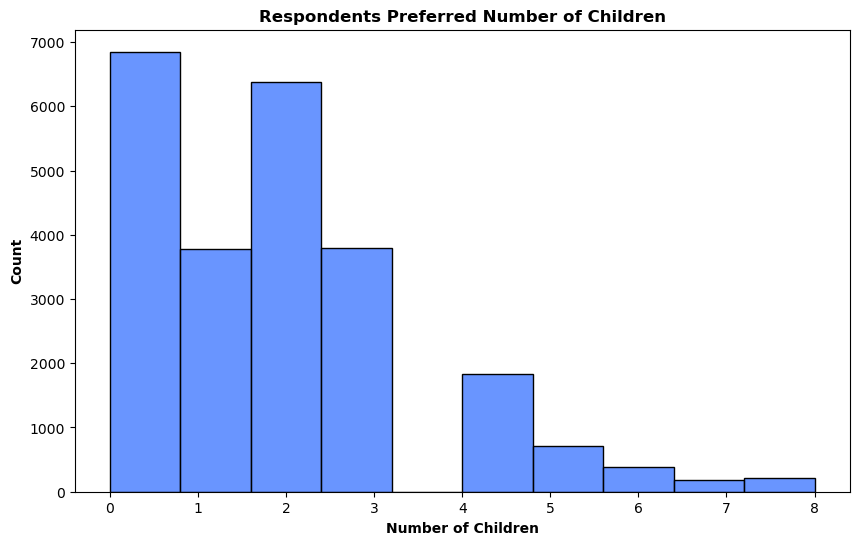

In [46]:
# VISUAL SUMMARIES / PLOTS:

import matplotlib.pyplot as plt
import seaborn as sns

# histogram for the var 'childs':
plt.figure(figsize=(10,6))
sns.histplot(cleaned_df['childs'].dropna(), bins=10, color = '#3772FF')

# scaffolding:
plt.xlabel(xlabel = 'Number of Children', weight = 'bold')
plt.ylabel(ylabel = 'Count', weight = 'bold')
plt.title("Respondents Preferred Number of Children", weight = 'bold')
plt.show()


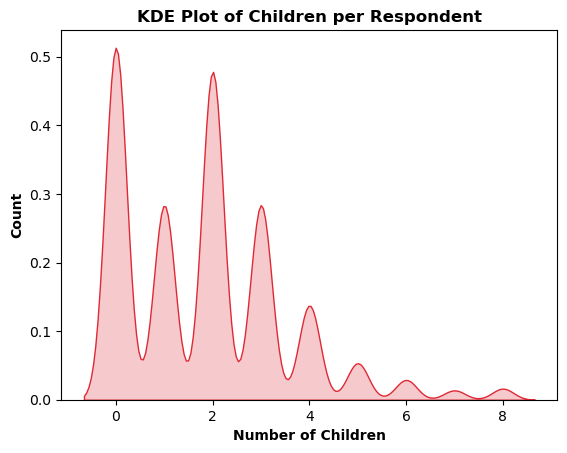

In [38]:
# CHILDS: KDE Plot
sns.kdeplot(cleaned_df['childs'].dropna(), fill = True, color = '#DF2935')

#   Scaffolding:
plt.xlabel(xlabel = 'Number of Children', weight = 'bold')
plt.ylabel(ylabel= 'Count', weight = 'bold')
plt.title("KDE Plot of Children per Respondent", weight = 'bold')
plt.show()

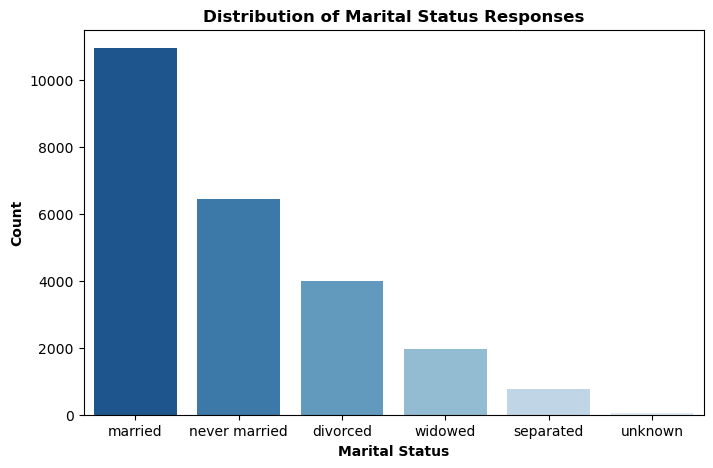

In [45]:
# counting the sum of each marital status answer(response):
marital_counts = df['marital'].value_counts()

# plotting a bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=marital_counts.index, y=marital_counts.values, palette="Blues_r")
plt.xlabel("Marital Status", weight = 'bold')
plt.ylabel("Count", weight = 'bold')
plt.title("Distribution of Marital Status Responses", weight = 'bold')

plt.show()


**Q5)** Describe your findings in 1-2 pages.

The dataframe overall has plenty of missing values. We had to drop the column 'abimp' or the importance of abortion to respondents since about 96% of the data was missing or NaN values. Altogether, the variables are related through representing commonly intertwined issues such as abortion, the confidence in the American healthcare offered, as well as marital status. The kde plot and histogram of the 'childs' column indicates the average being about 1-2 kids per respondent with higher number of children being uncommon as demonstrated by the plot being right-skewed. Fewer children can be indicative of generational shifts and changing views about family structure. The bar chart for the marital variable illustrates that marriage is quite common still and is the most frequent response from the data gathered, with divorce being third on the rankings. If we were to compare data from previous years or the last few decades, we could compare the frequency of divorce and marriage and view whether we are seeing an increase in divorce due to shifting cultural and societal norms. Attitudes towards abortion are quite controversial as of now, especially with the overturning of Roe vs. Wade recently. Both 'abhlth' and 'abrape' measure the attitudes towards abortion, with about 80% of respondents stating that abortion is fine in the case of rape. It's interesting to see how the majority of respondents believe abortion to be permitted, yet the country as a whole has recently gone back. An interesting study or comparison to be made would be analyzing the change in 'conmedic' or the confidence in medical care along with the overturning of Roe v. Wade. Gathering data from then and now and comparing them would be quite interesting to see whether there has been a downward trend since then, or if it has just continued to decline even steeper as a result. Overall, many more bar graphs for the categorical variables along with more data gathered from the specific time settings of these recent controversial decisions/regulations would make an interesting cross section.